# Homework 1 Mobility for Wheeled Ground Systems

Import Statements

In [39]:
from typing import List
from math import sin, cos, radians
import matplotlib.pyplot as plot
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Rectangle

Define skid steer robot

In [40]:
class SkidRobot:
    def __init__(self, length: float, width: float, x=0, y=0) -> None:
        """Creates a robot

        Args:
            length (float): length of the robot (m)
            width (float): width of the robot (m)
        """
        self.length = length
        self.width = width
        self.x = x
        self.y = y
        self.theta = 0
    
    def move(self, velocity_left: float, velocity_right: float, dt: float = 0.1) -> None:
        """
        Ripped straight from the lectures in class, with some pythony modifications

        Args:
            velocity_left (float): velocity of the left side (m/s)
            velocity_right (float): velocity of the right side (m/s)
            dt (float, optional): polling rate of the robot. Defaults to 0.1.
        """
        self.x -= (.5 * (velocity_left + velocity_right)) * sin(self.theta) * dt
        self.y += (.5 * (velocity_left + velocity_right)) * cos(self.theta) * dt
        self.theta += (1 / self.width) * (velocity_right - velocity_left) * dt
        
    def get_coords(self) -> "tuple[float, float]":
        return (self.x, self.y)
    
    def move_for_duration(self, duration: float, velocity_left: float, velocity_right: float, dt: float = 0.1) -> "tuple[list, list, list]":
        """
        Helper function that acts as a wrapper around the move, as well as returns points for plotting

        Args:
            duration (float): total time for the command to run (s)
            velocity_left (float): left velocity of the command (m/s)
            velocity_right (float): right velocity of the command (m/s)

        Returns:
            tuple[list, list, list]: lists containing the x and y positions as well as the angular momentum at each step
        """
        path_x = []
        path_y = []
        angular_momentum = []
        
        # put loop in terms of dt
        current_time = 0
        while (current_time < duration ):
            path_x.append(self.x)
            path_y.append(self.y)
            angular_momentum.append(self.get_angular_momentum(dt, velocity_left, velocity_right))
            self.move(velocity_left, velocity_right, dt)
            current_time += dt

        # Store final point
        path_x.append(self.x)
        path_y.append(self.y)
        angular_momentum.append(self.get_angular_momentum(dt, velocity_left, velocity_right))
        return path_x, path_y, angular_momentum

    def get_bounds(self) -> "tuple[float, float]":
        return (self.width, self.length)

    def get_angular_momentum(self, duration: float, velocity_left: float, velocity_right: float) -> float:
        delta_theta = duration * ((velocity_right - velocity_left) / self.width)
        return radians(delta_theta)

## Question 1

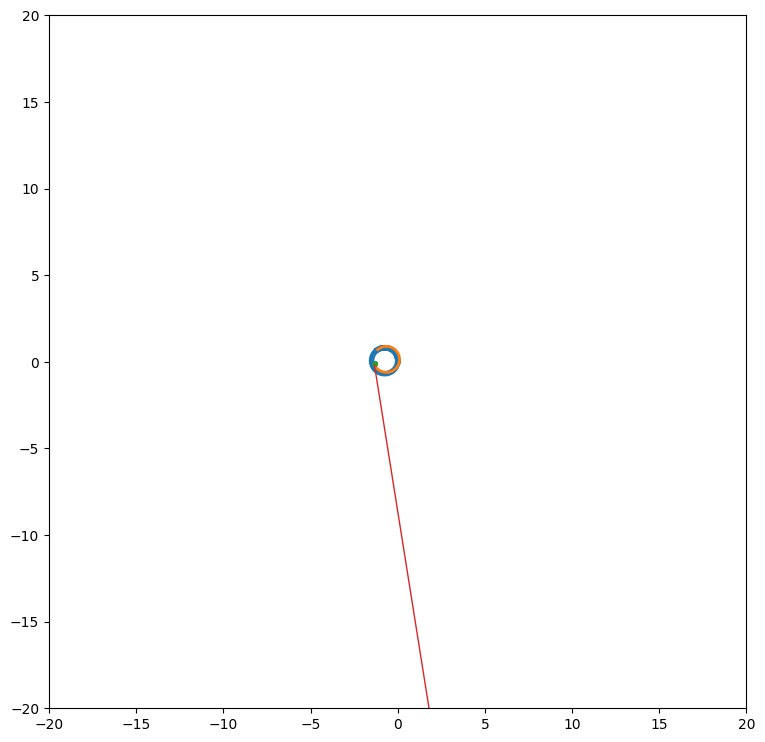

In [41]:
figure = plot.figure(figsize=(9,9))
axes = plot.axes(xlim=(-20,20), ylim=(-20,20))

robot = SkidRobot(.5, .3)

# Run robot
x0, y0, _ = robot.move_for_duration(5, 1, 1.5)
x1, y1, _ = robot.move_for_duration(3, -1, -1.5)
x2, y2, _ = robot.move_for_duration(8, .8, -2)
x3, y3, _ = robot.move_for_duration(10, 2, 2)

# Plot path
line0, = axes.plot(x0, y0, lw=4)
line1, = axes.plot(x1, y1, lw=2)
line2, = axes.plot(x2, y2, lw=2)
line3, = axes.plot(x3, y3, lw=1)

## Question 2: 5m x 5m box

### Skid Steer Command Path
The table of commands we use is as follows:

#### Step 1. Move to starting postion
| Time | Velocity L| Velocity R|
| :--- | --- | --- |
| 0.3 | 1 | 1 |

#### Step 2: Run the main body loop

Loop over this set of instructions 8 times
| Time | Velocity L | Velocity R |
| :--- | --- | --- |
| 4.4 | 1 | 1 |
| 2 | 0.11780972451 | -0.11780972451 |
| 0.3 | 1 | 1 |
| 2 | 0.11780972451 | -0.11780972451 |
| 4.4 | 1 | 1 |
| 2 | -0.11780972451 | 0.11780972451 |
| 0.3 | 1 | 1 |
| 2 | -0.11780972451 | 0.11780972451 |

#### Step 3: Move to end postion

| Time | Velocity L | Velocity R |
| :--- | --- | --- |
| 4.4 | 1 | 1 |

Define plotting function

In [42]:
def plot_path_x_y_angular_velocities(path_x, path_y, angular_momentum) -> None:

    # Graph the path of the robot
    figure, axes = plot.subplots()
    figure.set_size_inches(9, 9)
    axes.set_xbound(0, 10)
    axes.set_ybound(0, 10)
    axes.set_title("Path")
    axes.add_patch(Rectangle((0, 0), 5, 5, facecolor="none", ec='k', lw=2))

    for index, path in enumerate(path_x):
        axes.plot(path_x[index], path_y[index], lw=4)

    # Flatten lists
    path_x = [item for sublist in path_x for item in sublist]
    path_y = [item for sublist in path_y for item in sublist]
    angular_momentum = [item for sublist in angular_momentum for item in sublist]

    # Plot angular momentum by command (each command has constant angular momentum)
    figure, axes = plot.subplots()
    figure.set_size_inches(9, 9)
    axes.plot(angular_momentum)
    axes.set_title("Angular Momentum")
    axes.set_xlabel("Time step")

    # Plot x position by time
    figure, axes = plot.subplots()
    figure.set_size_inches(9, 9)
    axes.plot(path_x, label="x")
    axes.set_xlabel("Time step")
    axes.set_title("Position X")

    # Plot y position by time
    figure, axes = plot.subplots()
    figure.set_size_inches(9, 9)
    axes.plot(path_y, label="y")
    axes.set_xlabel("Time step")
    axes.set_title("Position Y")

Create and run skid steer robot

In [54]:
from math import pi


robot = SkidRobot(.5, .3)

path_x = []
path_y = [] 
angular_momentum = []

# Move to starting position
duration, velocity_left, velocity_right = 0.3, 1, 1
sub_path_x, sub_path_y, sub_angular_momentum = robot.move_for_duration(duration, velocity_left, velocity_right)

path_x.append(sub_path_x)
path_y.append(sub_path_y)
angular_momentum.append(sub_angular_momentum)

# Repeat coverage process
for _ in range(8):
    # Move to the end of the line
    duration, velocity_left, velocity_right = 4.4, 1, 1
    sub_path_x, sub_path_y, sub_angular_momentum = robot.move_for_duration(duration, velocity_left, velocity_right)
    
    path_x.append(sub_path_x)
    path_y.append(sub_path_y)
    angular_momentum.append(sub_angular_momentum)

    # Turn -90 degrees in place
    duration, velocity_left, velocity_right = 2, 0.11780972451, -0.11780972451
    sub_path_x, sub_path_y, sub_angular_momentum = robot.move_for_duration(duration, velocity_left, velocity_right)

    
    path_x.append(sub_path_x)
    path_y.append(sub_path_y)
    angular_momentum.append(sub_angular_momentum)

    # Move forward enough for coverage
    duration, velocity_left, velocity_right = 0.3, 1, 1
    sub_path_x, sub_path_y, sub_angular_momentum = robot.move_for_duration(duration, velocity_left, velocity_right)
    
    path_x.append(sub_path_x)
    path_y.append(sub_path_y)
    angular_momentum.append(sub_angular_momentum)

    # Turn -90 degrees in place
    duration, velocity_left, velocity_right = 2, 0.11780972451, -0.11780972451
    sub_path_x, sub_path_y, sub_angular_momentum = robot.move_for_duration(duration, velocity_left, velocity_right)
    
    path_x.append(sub_path_x)
    path_y.append(sub_path_y)
    angular_momentum.append(sub_angular_momentum)

    # Move to the end of the line
    duration, velocity_left, velocity_right = 4.4, 1, 1
    sub_path_x, sub_path_y, sub_angular_momentum = robot.move_for_duration(duration, velocity_left, velocity_right)
    
    path_x.append(sub_path_x)
    path_y.append(sub_path_y)
    angular_momentum.append(sub_angular_momentum)

    # Turn 90 degrees in place
    duration, velocity_left, velocity_right = 2, -0.11780972451, 0.11780972451
    sub_path_x, sub_path_y, sub_angular_momentum = robot.move_for_duration(duration, velocity_left, velocity_right)
    
    path_x.append(sub_path_x)
    path_y.append(sub_path_y)
    angular_momentum.append(sub_angular_momentum)

    # Move forward enough for coverage
    duration, velocity_left, velocity_right = 0.3, 1, 1
    sub_path_x, sub_path_y, sub_angular_momentum = robot.move_for_duration(duration, velocity_left, velocity_right)
    
    path_x.append(sub_path_x)
    path_y.append(sub_path_y)
    angular_momentum.append(sub_angular_momentum)

    # Turn 90 degrees in place
    duration, velocity_left, velocity_right = 2, -0.11780972451, 0.11780972451
    sub_path_x, sub_path_y, sub_angular_momentum = robot.move_for_duration(duration, velocity_left, velocity_right)
    
    path_x.append(sub_path_x)
    path_y.append(sub_path_y)
    angular_momentum.append(sub_angular_momentum)

# Move to end position
duration, velocity_left, velocity_right = 4.4, 1, 1
sub_path_x, sub_path_y, sub_angular_momentum = robot.move_for_duration(duration, velocity_left, velocity_right)

path_x.append(sub_path_x)
path_y.append(sub_path_y)
angular_momentum.append(sub_angular_momentum)

Graph the path, x, y, and angular momentum of Question 2

C:\Users\dalyn\AppData\Local\Temp\ipykernel_29328\3081915487.py:53: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


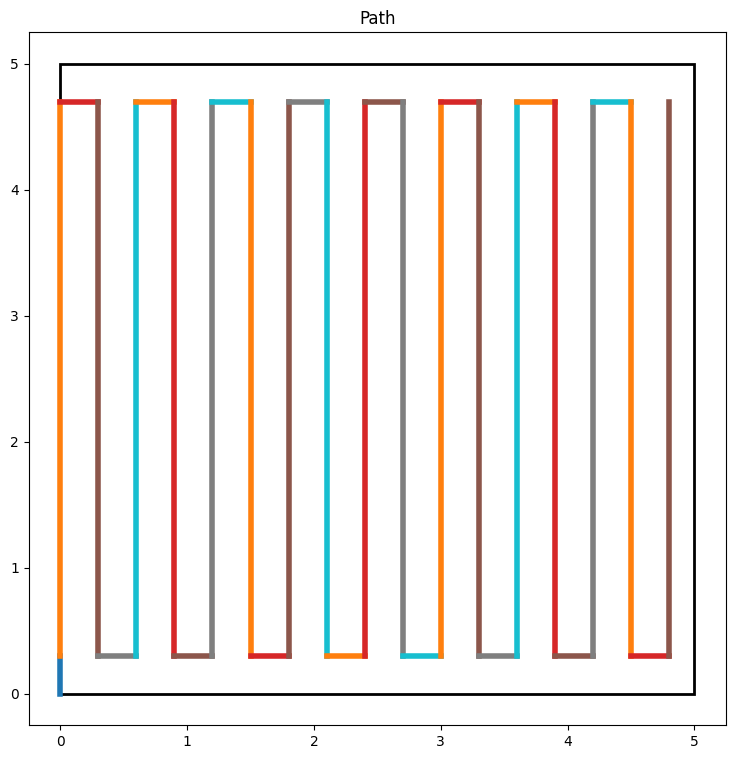

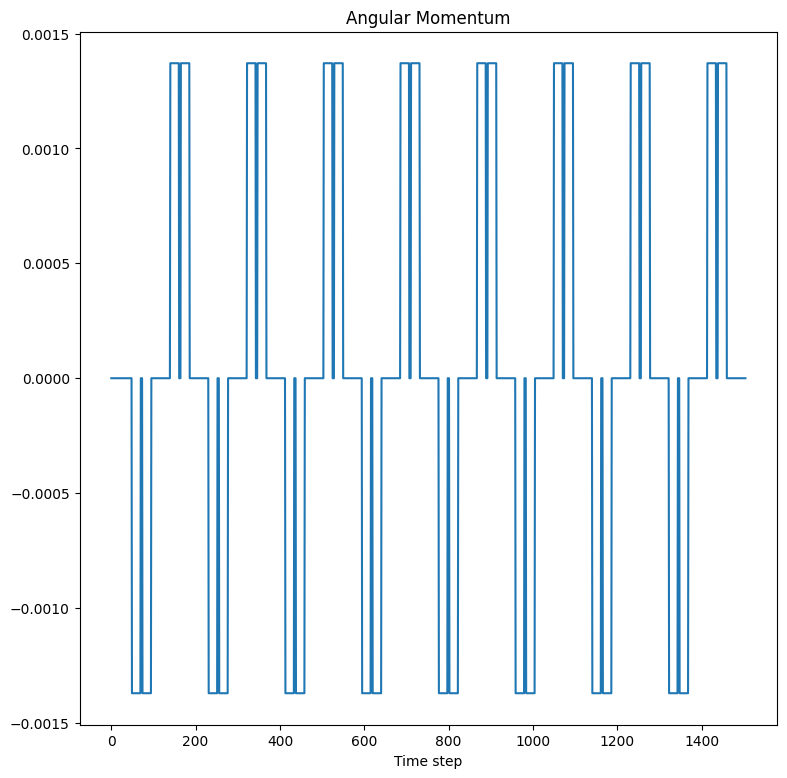

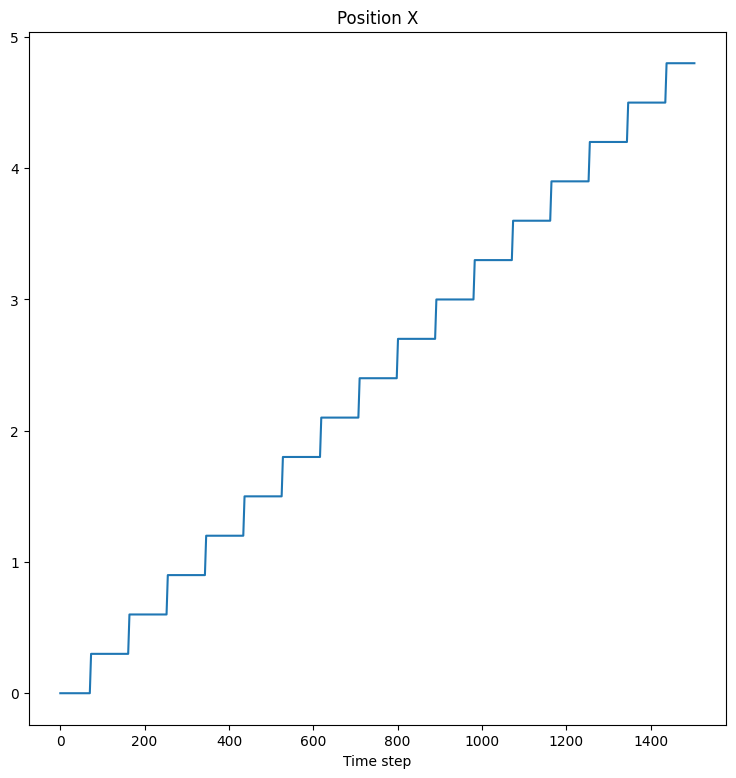

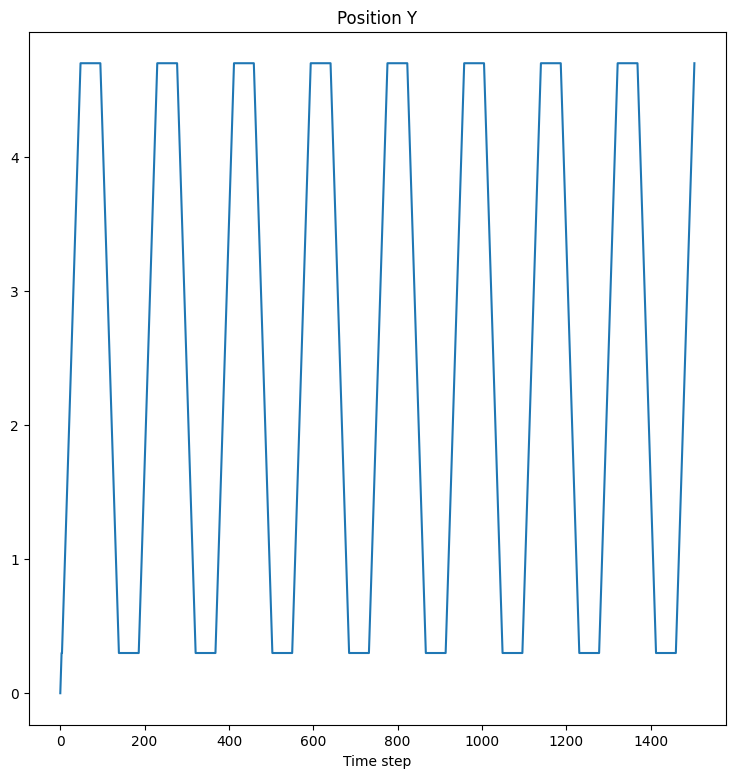

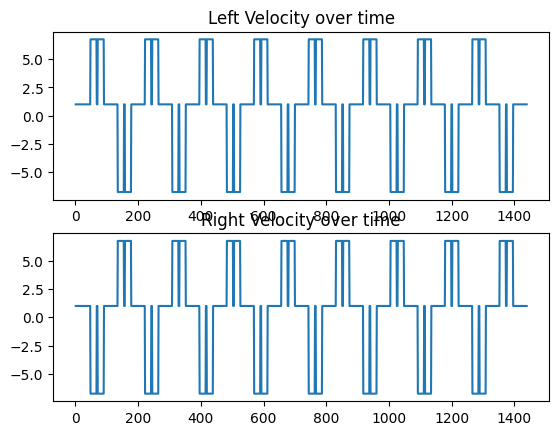

In [55]:
plot_path_x_y_angular_velocities(path_x, path_y, angular_momentum)

# Addition to graph x and y position
v_left = []
v_right = []

v_left += [1 for x in range(3)]
v_right += [1 for y in range(3)]
for _ in range(8):
    # 4.4 1 1
    v_left += [1 for x in range(44)]
    v_right += [1 for y in range(44)]
    
    # 2, 6.75, -6.75
    v_left += [6.75 for x in range(20)]
    v_right += [-6.75 for y in range(20)]
    
    #  0.3, 1, 1
    v_left += [1 for x in range(3)]
    v_right += [1 for y in range(3)]
    
    # 2, 6.75, -6.75
    v_left += [6.75 for x in range(20)]
    v_right += [-6.75 for y in range(20)]\
        
    # 4.4, 1, 1
    v_left += [1 for x in range(44)]
    v_right += [1 for y in range(44)]
    
    # 2, -6.75, 6.75
    v_left += [-6.75 for x in range(20)]
    v_right += [6.75 for y in range(20)]
    
    #  0.3, 1, 1
    v_left += [1 for x in range(3)]
    v_right += [1 for y in range(3)]
    
    # 2, -6.75, 6.75
    v_left += [-6.75 for x in range(20)]
    v_right += [6.75 for y in range(20)]
    
# 4.4, 1, 1
v_left += [1 for x in range(44)]
v_right += [1 for y in range(44)]

import matplotlib.pyplot as plt

fig, axes  = plt.subplots(2)
axes[0].plot(range(1, len(v_left) + 1), v_left)
axes[0].set_title("Left Velocity over time")
axes[1].plot(range(1, len(v_right) + 1), v_right)
axes[1].set_title("Right Velocity over time")
fig.show()

## Question 3 : Swedish

### Swedish Command Path
The table of commands we use is as follows:

#### Step 1. Move to starting postion
| Time | Velocity | Direction|
| :--- | --- | --- |
| 0.3 | 1 | 0 |

#### Step 2: Run the main body loop

Loop over this set of instructions 8 times
| Time | Velocity | Direction|
| :--- | --- | --- |
| 4.4 | 1 | 0 |
| 0.3 | 1 | 90 |
| 4.4 | 1 | 180 |
| 0.3 | 1 | 90 |

#### Step 3: Move to end postion

| Time | Velocity | Direction|
| :--- | --- | --- |
| 4.4 | 1 | 0 |

Define modified Skidrobot with Swedish wheels. 
It takes a direction and an overall velocity in contrast to the skid steer robot bot.

In [45]:
class SwedishRobot:
    def __init__(self, length: float, width: float, x=0, y=0) -> None:
        """Creates a robot

        Args:
            length (float): length of the robot (m)
            width (float): width of the robot (m)
        """
        self.length = length
        self.width = width
        self.x = x
        self.y = y
    
    def move(self, velocity: float, theta: float, dt: float = 0.1) -> None:
        """
        Ripped straight from the lectures in class, with some pythony modifications

        Args:
            velocity (float): velocity of the robot (m/s)
            theta (float): direction of movement (degrees)
            dt (float, optional): polling rate of the robot. Defaults to 0.1.
        """
        self.x -= velocity * sin(radians(theta)) * dt
        self.y += velocity * cos(radians(theta)) * dt
      
    def get_coords(self) -> "tuple[float, float]":
        return (self.x, self.y)
    
    def move_for_duration(self, duration: float, velocity: float, theta: float, dt: float = 0.1) -> "tuple[list, list, list]":
        """
        Helper function that acts as a wrapper around the move, as well as returns points for plotting

        Args:
            duration (float): total time for the command to run (s)
            velocity (float): velocity of the command (m/s)
            theta (float): direction of the command (degrees)
            dt (float, optional): polling rate of the robot. Defaults to 0.1.

        Returns:
            tuple[list, list, list]: lists containing the x and y positions as well as the angular momentum at each step
        """
        path_x = []
        path_y = []
        angular_momentum = []
        
        # put loop in terms of dt
        current_time = 0
        while (current_time < duration ):
            path_x.append(self.x)
            path_y.append(self.y)
            angular_momentum.append(self.get_angular_momentum(dt, velocity))
            self.move(velocity, theta, dt)
            current_time += dt

        # Store final point
        path_x.append(self.x)
        path_y.append(self.y)
        angular_momentum.append(self.get_angular_momentum(dt, velocity))
        return path_x, path_y, angular_momentum

    def get_bounds(self) -> "tuple[float, float]":
        return (self.width, self.length)

    def get_angular_momentum(self, duration, velocity) -> float:
        return 0 # Our swedish wheel robot never turns

Create and run swedish wheel robot

In [46]:
robot = SwedishRobot(.5, .3)

path_x = []
path_y = [] 
angular_momentum = []

# Move to starting position
duration, velocity = 0.3, 1 # Duration in seconds, velocity in m/s
sub_path_x, sub_path_y, sub_angular_momentum = robot.move_for_duration(duration, velocity, 0)


path_x.append(sub_path_x)
path_y.append(sub_path_y)
angular_momentum.append(sub_angular_momentum)

# Repeat coverage process
for _ in range(8):
    # Move to the end of the line
    duration, velocity = 4.4, 1
    sub_path_x, sub_path_y, sub_angular_momentum = robot.move_for_duration(duration, velocity, 0)
    
    
    path_x.append(sub_path_x)
    path_y.append(sub_path_y)
    angular_momentum.append(sub_angular_momentum)


    # Move forward enough for coverage
    duration, velocity = 0.3, 1
    sub_path_x, sub_path_y, sub_angular_momentum = robot.move_for_duration(duration, velocity, -90)
    
    
    path_x.append(sub_path_x)
    path_y.append(sub_path_y)
    angular_momentum.append(sub_angular_momentum)

    # Move to the end of the line
    duration, velocity = 4.4, 1
    sub_path_x, sub_path_y, sub_angular_momentum = robot.move_for_duration(duration, velocity, 180)
    
    
    path_x.append(sub_path_x)
    path_y.append(sub_path_y)
    angular_momentum.append(sub_angular_momentum)


    # Move forward enough for coverage
    duration, velocity = 0.3, 1
    sub_path_x, sub_path_y, sub_angular_momentum = robot.move_for_duration(duration, velocity, -90)
    
    
    path_x.append(sub_path_x)
    path_y.append(sub_path_y)
    angular_momentum.append(sub_angular_momentum)


# Move to end position
duration, velocity = 4.4, 1
sub_path_x, sub_path_y, sub_angular_momentum = robot.move_for_duration(duration, velocity, 0)


path_x.append(sub_path_x)
path_y.append(sub_path_y)
angular_momentum.append(sub_angular_momentum)

Graph the path, x, y, and angular momentum of Question 3

C:\Users\dalyn\AppData\Local\Temp\ipykernel_29328\2033781541.py:39: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


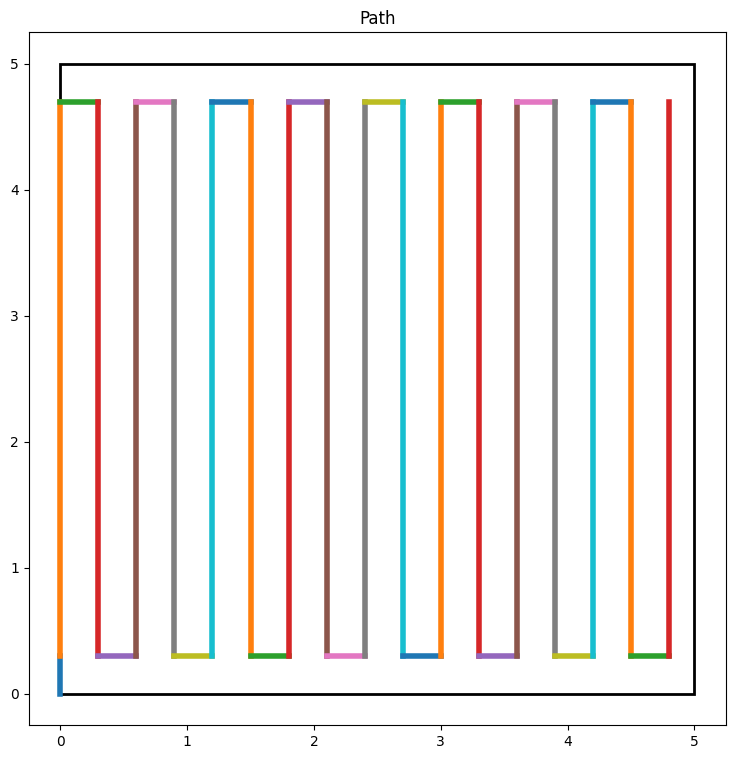

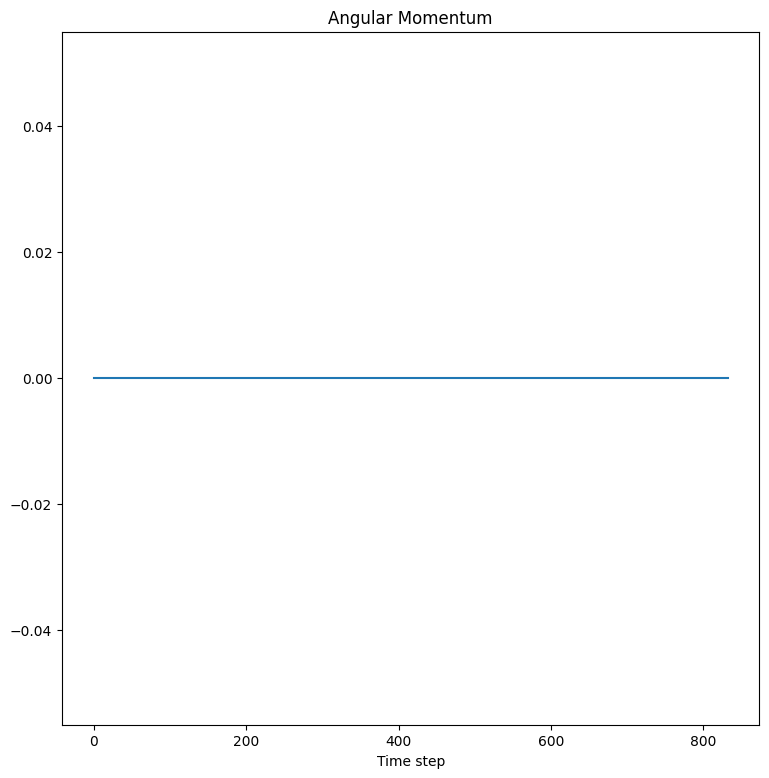

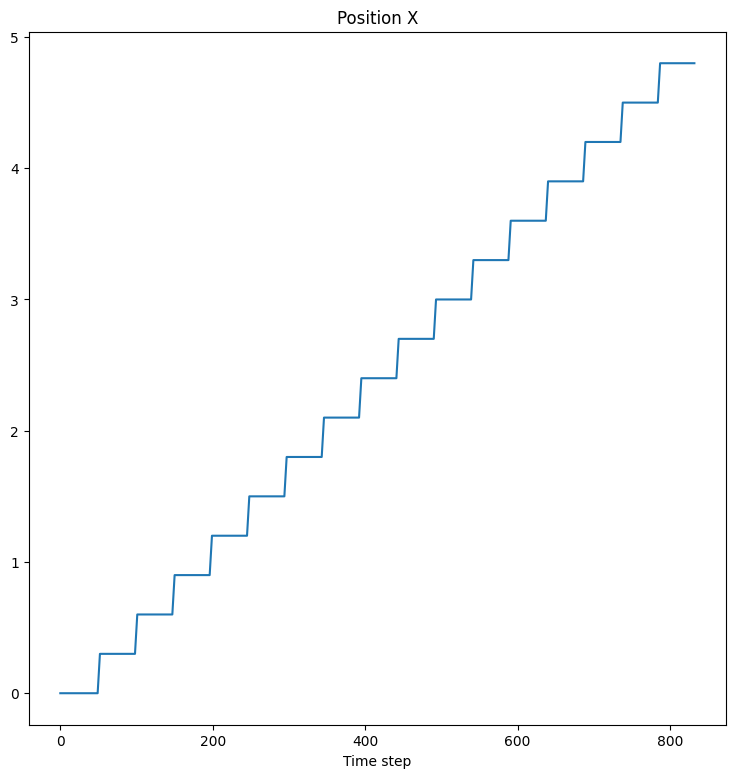

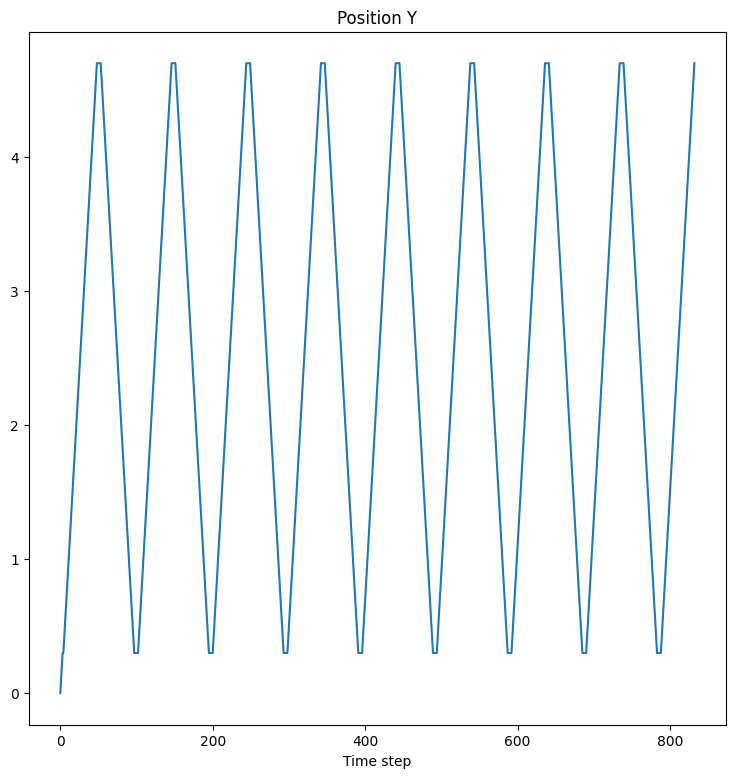

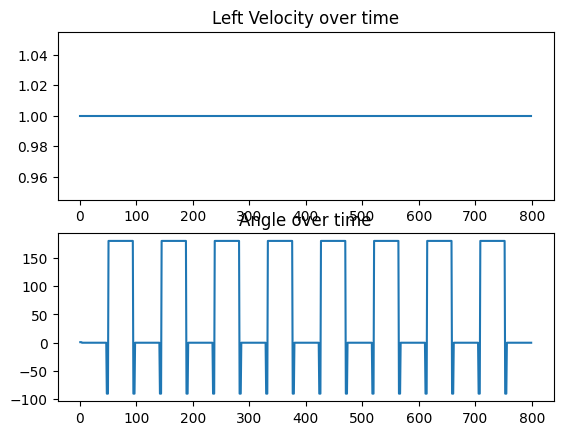

In [47]:
plot_path_x_y_angular_velocities(path_x, path_y, angular_momentum)

# Addition to graph x and y position
velocity = []
angle = []

velocity += [1 for x in range(3)]
angle += [1 for y in range(3)]
for _ in range(8):
    # 4.4 1 1
    velocity += [1 for x in range(44)]
    angle += [0 for y in range(44)]
    
    #  0.3, 1, 1
    velocity += [1 for x in range(3)]
    angle += [-90 for y in range(3)]
    
    # 4.4, 1, 1
    velocity += [1 for x in range(44)]
    angle += [180 for y in range(44)]
    
    
    #  0.3, 1, 1
    velocity += [1 for x in range(3)]
    angle += [-90 for y in range(3)]
    

# 4.4, 1, 1
velocity += [1 for x in range(44)]
angle += [0 for y in range(44)]

import matplotlib.pyplot as plt

fig, axes  = plt.subplots(2)
axes[0].plot(range(1, len(velocity) + 1), velocity)
axes[0].set_title("Left Velocity over time")
axes[1].plot(range(1, len(angle) + 1), angle)
axes[1].set_title("Angle over time")
fig.show()

## Comparison between Swedish and Normal Wheels

Besides the different control schema of `v_left, v_right` vs `velocity, angle`, we find that the swedish robot can complete the path in a much shorter amount of time.  As seen by comparing the two graph above for positions, the skid steer will occassionally plateau its movement in order to spend time turning, whereas the swedish robot can immediately head the specified direction.

Some problems that you would have when translating over your commands are 
- The different control scheme
- The inability to easily control the facing angle of the swedish robot
- swedish robotst need time to account for turning.

However, other than that the commands are very similar between the two, with the swedish robot just removing the time for turning.